# Part II - Prosper Loan
## by Aghazada Samir

In this project, I have analysed ProsperLoanData.csv file in order to find the most reliable people to lend money. To find the best slice of population to lend money, I used "Occupation" column. After wrangling and some visualization process I found that goodperformer occupations are the most reliable people to lend money. Because return is high and monthly income ranges are high. 


## Investigation Overview

Overall goal of my presentation is demonstrates to people who lend money to people. My target is to find the best and worst performance by occupations during last credit records.

## Dataset Overview

Dataset have 81 columns and 113937 rows. After some part I divided dataset into 2 parts in order to better understand the
data.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv',encoding='latin-1', low_memory=False)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Count of borrower occupations
The bar chart demonstrates counts of occupations that people have in the dataset. We can see top 3 occupations are Computer programmer, Executive and Teachers. But I want to concantrate Analyst and Doctors. Analysts are in top 5 and Doctors are least borrower occupations.


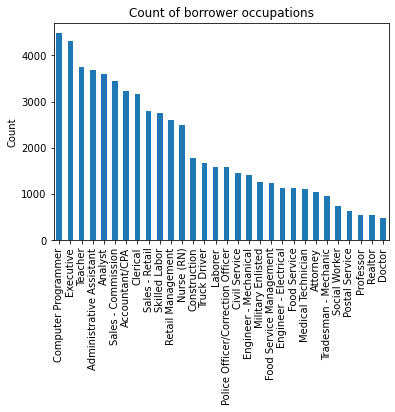

In [40]:
df['Occupation'].value_counts()[2:32].plot(kind='bar')
plt.title("Count of borrower occupations")
plt.ylabel('Count');

## Average Monthly income
The histogram shows stated monthly income of people who want to borrow money. It shows us most of the people
have 5k dollars in a month in general.

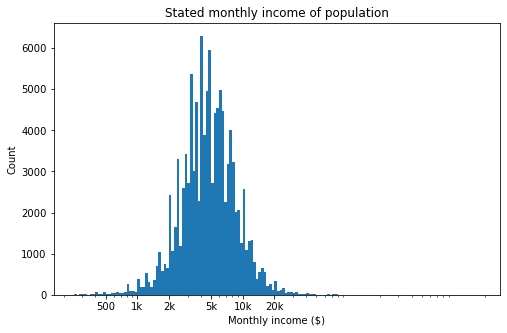

In [39]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Monthly income ($)')
plt.ylabel('Count')
plt.title('Stated monthly income of population')
plt.show()

## On time payment vs monthly income
I analysed minimum and maximum earning occupations in average and find out how does relationship change between monthly income and prosper payment on time. I found that most earned profession is Doctor and least earning people are Students from Sophomo College. Scatter plots shows that there are positive correlation between these two variables. What interesting is after looking late payment, surprisingly Students have no late payments, even if they are the least earning people, but Doctors have.


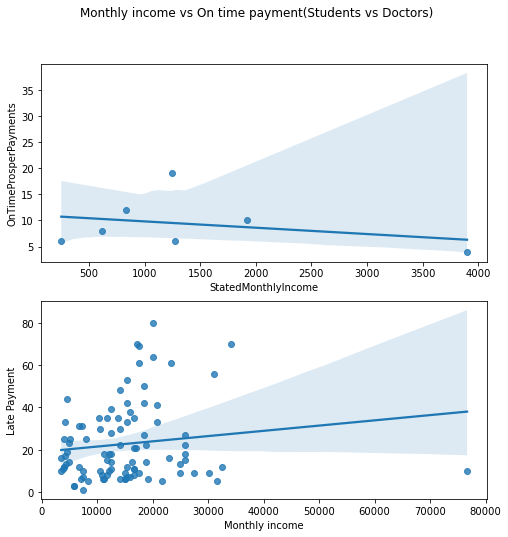

In [37]:
Comp=df[df['Occupation']=='Student - College Sophomore']
Doc=df[df['Occupation']=='Doctor']

fig, ax = plt.subplots(nrows=2, figsize = [8,8])
sb.regplot(data=Comp, x='StatedMonthlyIncome', y='OnTimeProsperPayments', ax=ax[0])
sb.regplot(data=Doc, x='StatedMonthlyIncome', y='OnTimeProsperPayments',ax=ax[1])
plt.xlabel("Monthly income")
plt.ylabel("Late Payment")
plt.suptitle("Monthly income vs On time payment(Students vs Doctors)")
plt.show()

## The worst performances by occupations
 In order to find worst performances I used Monthly income and Late payments. I found out that top 5 countries as follows in the chart. This means that lending money to people who have these occupations are carrying risk to return the money back.

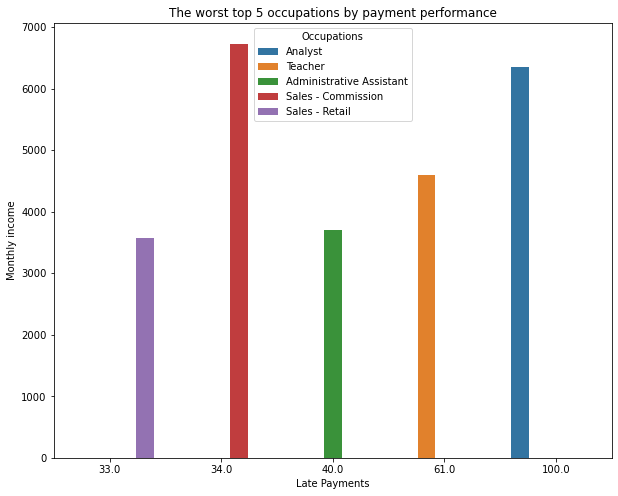

In [5]:
frame2=pd.DataFrame(df.groupby("Occupation")["ProsperPaymentsOneMonthPlusLate","StatedMonthlyIncome"].agg({'ProsperPaymentsOneMonthPlusLate':'sum','StatedMonthlyIncome':'mean'}))
frame2=frame2.sort_values(by='ProsperPaymentsOneMonthPlusLate',ascending=False)
frame2 = frame2.reset_index()
frame2.columns = ['Occupations', 'Late Payments', 'Monthly income']
frame3=frame2[2:].head()
plt.figure(figsize=(10,8))
g = sb.barplot(data=frame3, x='Late Payments', y='Monthly income' , hue='Occupations' )
plt.ylabel("Monthly income")
plt.title("The worst top 5 occupations by payment performance")
ax = plt.subplot()


Unlike worst performance I have analysed the best top 5 occupations to lend money. These people have 0 late payments and have the highest monthly income.

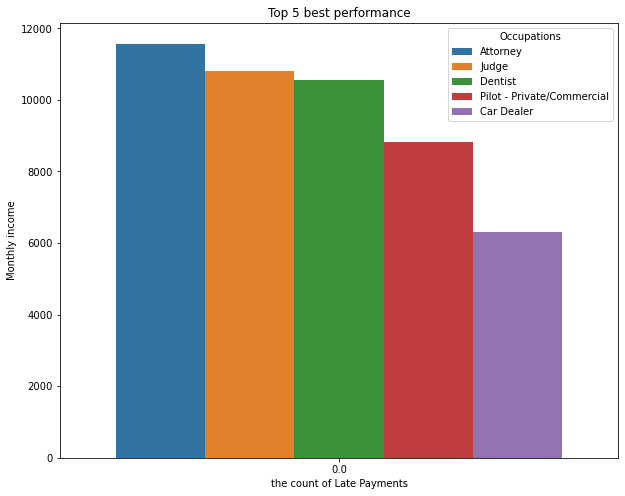

In [7]:
frame4=frame2.sort_values('Monthly income', ascending=False)
a=frame4[frame4['Late Payments']==0.0].head()
a.head()
plt.figure(figsize=(10,8))
g = sb.barplot(data=a, x='Late Payments', y='Monthly income' , hue='Occupations' )
plt.ylabel("Monthly income")
plt.xlabel("the count of Late Payments")
plt.title("Top 5 best performance");

In the last chart I want to represent how estimated loss and return are changing in terms of bad and good performance.
It is obvious that lend money to good performanced occupations brings higher return.

Text(0.5, 1.08, 'Estimated return and loss in terms of bad performance')

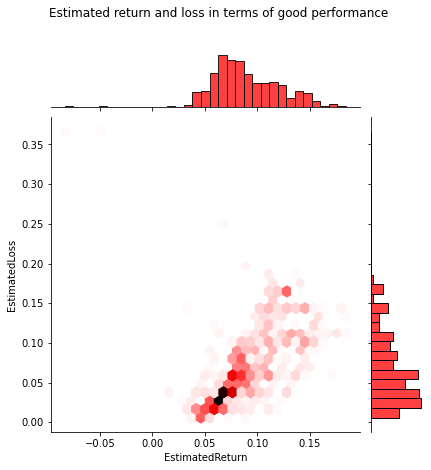

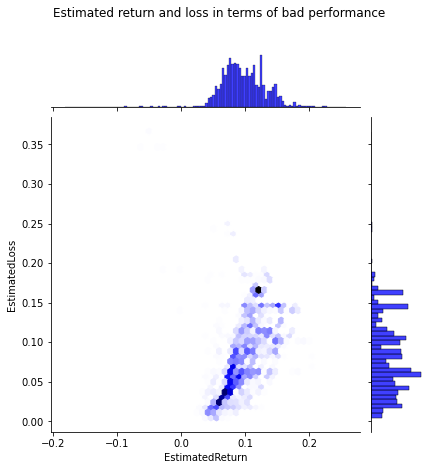

In [12]:
badperformance=df.loc[df['Occupation'].isin(['Analyst', 'Teacher', 'Administrative Assistant','Sales - Commission','Sales - Retail'])]
badperformance=badperformance.loc[badperformance['IncomeRange'].isin(['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999','$1-24,999','$0'])]
goodperformance=df.loc[df['Occupation'].isin(['Attorney', 'Judge', 'Dentist','Pilot - Private/Commercial','Car Dealer'])]
goodperformance=goodperformance.loc[goodperformance['IncomeRange'].isin(['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999','$1-24,999','$0'])]
sb.jointplot("EstimatedReturn", "EstimatedLoss", goodperformance, kind='hex',color='red')
plt.suptitle("Estimated return and loss in terms of good performance",y=1.08)
sb.jointplot("EstimatedReturn", "EstimatedLoss", badperformance, kind='hex', color='blue')
plt.suptitle("Estimated return and loss in terms of bad performance", y=1.08)

As conclusion I want to note my recommendation to lenders. According to dataset attorneys, judges, dentists, Pilots and car 
dealers are the best part of the population to lend money. They have 0 late payments during the passed years and have the 
highest income. But, Teachers, Salers, Analysts and adminisstrative assistants have the worst record on late payments. They 
are carrying big risk to pay money back. One interesting fact is that Students have lowest income, but there are no late payments.

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [4]:
!jupyter Part_II_slide_deck_template-checkpoint.ipynb --to slides --post serve --no-input --no-prompt


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console kernel kernelspec lab
labextension labhub migrate nbclassic nbconvert nbextension notebook qtconsole
run script server serverextension troubleshoot trust

Jupyter command `jupyter-Part_II_slide_deck_template-checkpoint.ipynb` not found.
